In [12]:
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.1 MB/s eta 0:00:00


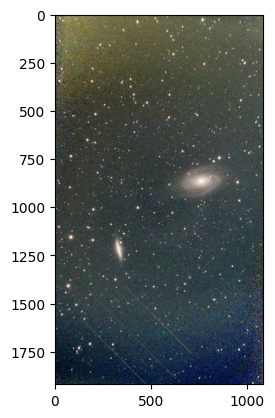

In [13]:
import requests
from astropy.io import fits
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from auto_stretch import apply_stretch

fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/Homework2025/2025/HW/codeBall01/Stacked_878_M%2081_10.0s_IRCUT_20250311-011812.fit"

# Fetch the FITS file from the GitHub repository
response = requests.get(fits_url)
response.raise_for_status()  # Check for request errors

hdul = fits.open(BytesIO(response.content))

# Assume the first extension contains an RGB image in (3, Height, Width) format
rgb_data = np.transpose(hdul[0].data, (1, 2, 0))  # Shape should be (3, Height, Width)
hdul.close() #

# Display the image
fig = plt.figure()
plt.imshow(apply_stretch(rgb_data))


In [14]:
from astropy.wcs import WCS
wcs = WCS(hdul[0].header, naxis=2)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP' 'DEC--TAN-SIP' 
CRVAL : 147.719534461 69.180207647 
CRPIX : 448.877716064 632.77357769 
CD1_1 CD1_2  : 0.000685632230266 0.000872120328109 
CD2_1 CD2_2  : -0.000871686165426 0.000686045989949 
NAXIS : 1080  1920  3

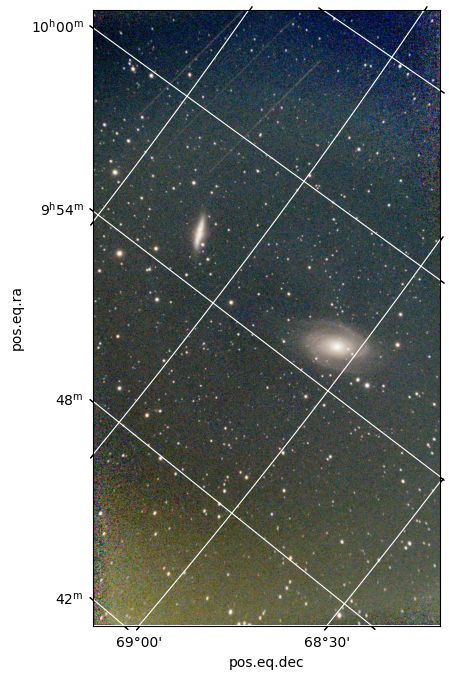

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=wcs)
plt.imshow(apply_stretch(rgb_data), origin='lower')
ax.coords.grid(color='white', ls='solid')

NCG 3077 has sky coords:

Position (RA):	10 3 21.45
Position (Dec):	68° 44' 3.26"

which means it is outof frame for this picture

In [ ]:
#Research:

#https://apod.nasa.gov/apod/ap250507.html#:~:text=Explanation%3A%20In%20the%20upper%20left,gas%2C%20is%20irregular%20galaxy%20M82.